# Exercise 4
In this exercise, we will control a 2D drone depicted in the figure below <br>
<img src='quadrotor.png' width="300">

Consider the following simplified linear model of the drone
$$\begin{align}
    x_{n+1} = A
    x_n + B u_n
\end{align}$$

where the components of the state $x_n$ correspond to the horizontal position and velocity of the quadrotor, its vertical position and velocity and its orientation and angular velocity. The control vector
$u_n$ contains the forces produced by the rotors (our control inputs).
The module ```quadrotor.py``` defines the matrices $A$ and $B$ and code to generate a simulation of the drone.

In [2]:
%pip install matplotlib
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install ipympl
%pip install qpsolvers

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [4]:
## what we need to do computation and display the drone
%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
from qpsolvers import solve_qp


import quadrotor

In [5]:
# the matrices A and B are already defined in the quadrotor module
print(f'A =\n {quadrotor.A}')
print(f'B =\n {quadrotor.B}')

A =
 [[ 1.      0.01    0.      0.      0.      0.    ]
 [ 0.      1.      0.      0.     -0.0981  0.    ]
 [ 0.      0.      1.      0.01    0.      0.    ]
 [ 0.      0.      0.      1.      0.      0.    ]
 [ 0.      0.      0.      0.      1.      0.01  ]
 [ 0.      0.      0.      0.      0.      1.    ]]
B =
 [[ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.     0.   ]
 [ 0.02   0.02 ]
 [ 0.     0.   ]
 [ 0.015 -0.015]]


In [6]:
# we can display the behavior of the drone based on a given control input

# we can also start at x0 = 0 and generate a random control of 0 for 300 time steps
x0 = np.zeros((6,1))
u = np.random.rand(2,300)

quadrotor.animate_robot(x0, u, goal=[3,3])

<source type="video/mp4" src="data:video/mp4;base64,AAAAIGZ0eXBNNFYgAAACAE00ViBpc29taXNvMmF2YzEAAAAIZnJlZQAAIJxtZGF0AAACrwYF//+r
3EXpvebZSLeWLNgg2SPu73gyNjQgLSBjb3JlIDE2NCByMzEwOCAzMWUxOWY5IC0gSC4yNjQvTVBF
Ry00IEFWQyBjb2RlYyAtIENvcHlsZWZ0IDIwMDMtMjAyMyAtIGh0dHA6Ly93d3cudmlkZW9sYW4u
b3JnL3gyNjQuaHRtbCAtIG9wdGlvbnM6IGNhYmFjPTEgcmVmPTMgZGVibG9jaz0xOjA6MCBhbmFs
eXNlPTB4MzoweDExMyBtZT1oZXggc3VibWU9NyBwc3k9MSBwc3lfcmQ9MS4wMDowLjAwIG1peGVk
X3JlZj0xIG1lX3JhbmdlPTE2IGNocm9tYV9tZT0xIHRyZWxsaXM9MSA4eDhkY3Q9MSBjcW09MCBk
ZWFkem9uZT0yMSwxMSBmYXN0X3Bza2lwPTEgY2hyb21hX3FwX29mZnNldD0tMiB0aHJlYWRzPTEy
IGxvb2thaGVhZF90aHJlYWRzPTIgc2xpY2VkX3RocmVhZHM9MCBucj0wIGRlY2ltYXRlPTEgaW50
ZXJsYWNlZD0wIGJsdXJheV9jb21wYXQ9MCBjb25zdHJhaW5lZF9pbnRyYT0wIGJmcmFtZXM9MyBi
X3B5cmFtaWQ9MiBiX2FkYXB0PTEgYl9iaWFzPTAgZGlyZWN0PTEgd2VpZ2h0Yj0xIG9wZW5fZ29w
PTAgd2VpZ2h0cD0yIGtleWludD0yNTAga2V5aW50X21pbj0xMCBzY2VuZWN1dD00MCBpbnRyYV9y
ZWZyZXNoPTAgcmNfbG9va2FoZWFkPTQwIHJjPWNyZiBtYnRyZWU9MSBjcmY9MjMuMCBxY29tcD0w
LjYwIHFwbWluPTAgcXBtYXg9NjkgcXBzdGVwPTQgaXBfcmF0aW89MS40MCBhcT0xOjEuMDAAgAAA
ETpliIQAEP/+94G/MstfIrrJcfnnfSyszzzkPHJdia640AAAAwAAAwABR4e1643dg1tJ0AAAGsAD
pCNT/0/dhJIzAJyZMhQHovEGSv/F3w0ijovPgSEF+f8XyAhQngyn0F6IKd/RkqYKmtWPIQQkVHrq
C7e94783CsYraD/MDtWVf9fL4FPGCyUIb/yIw70driWO22rSgsQN+97GElKO+ZSLYfvTeMkY9E33
7krU8FB+eRw0/MLPNBvKuolub1HTfuTez63BbnI6+oG6CfTlrmXe+EpEyrMhihCWZLQQLOn+y3lG
GnlN+dxkrvqSVT0E3MqZub8nEHVENNE/ib7AFnJ8bCFFu646akmpbJKTKfHxS9Nu4BJI0kjRq6Sd
9d/OIzRTeiwt+YRetBBxObHagl2YgEwAVx0OyDMG/VLL1vHnO4x7BmPvcTtA/qbjVz1/aKJAMB1f
/d1m1dIi/dSwC2LrxC3AAAA1wIJPue5zbjiiomfYtdTSKCYlUgaWLIWPYxbC/oXZ0jV8B4XYRIdB
x5S1YyRgTJz4oXUbUQvoW94fZ0Eat5Q0CjZfsUBOXxJqOonh/uQwNDcuMlXhcqz4jn1Ri7yTLagp
UPZ35gCJbbWh88Yxn7v6ic0EwbHqpsv24Vb8lQLzjgqCx2uprb6hSuDr33rREjU53ugmdsG6LmHJ
FyLQS0VvExObujlqOuq3xsvoTvT3r2+6TG+ya/yg6G2JDA78UShhPo+gmlKaUGZMeQ0GwdK+WKuH
CNQD5ojeWoZ/El+HQ6HWpF7C76f1xYgBv9x3TAliLMepyo+FKCMB3DO7W3b04RLJbf1UY7ZR+8hB
nHAyszq7Gif/xjED5yrMF5oew657rugX8YL/pJ+0Bdl0xRgzuMBXPSAwA1X21vpRuT3FVQtybTym
chXX49d9XIRTpuIi5Us/Cug3MTUTdvmEZW6O5//DfP2dgzQH/SFK5Ev7718cp5o3KFayh94NYZAB
dyYxkY23GXxWhmgbQzAaR7pirblpyBm1jgte2fMnugbAJta4H7TDfEGh/PdjbLK2ERRSkXRjdzo/
3DKw41fCvnDp9z11ON7+BkcD98XvSR1yN+lMJP5Zfr9r6YzUC/ASvHYZwUWvFPqcK+MDWd66SRpb
ZLjXd2ytBqAtfKucPhmPZEjbr48AAAMABH7eONC6Vf8ywyt2ABoqqqCnAaBFvhh19RkmSzCE8GLz
RfojGn9mgko44JD4wOY8SK5G0N4K76N/lx5ufyYYB/L8CzRdtdhFGn7W0Yf0YrJxGqHWl1U8hzV9
vYMN/AlMGsoxGMvG1FL1GHEr2REA+WlacLamfpN7aJoO3bl0ZybbOgNcR2+bicJawkGooo1eZ3bO
hOYf9nw4eCywM4HnnOU5dl2n2AIKnOP4X5zA0b00G14QKeLWLzKCOnyYjZCTqVqavv2leEFvTgwd
ZUO7TUzzRhyGnnX+c5rqadEFm4klLRBebnJdyuAWF1AtXWABe6BEnJTn6yORgmNfM92o/vM7qo5z
WCkktkNEmPtxI7d9yle9cO2fnWh5cxswmCrpKKOcE44/uo2yCIF+xtNjH6n4wF/aV7pYFXEPqYOu
8fqqtg5+plx6BGjgDncrFGhlhAK8q3zjAmO2nNGBWrsRuu9AgDVyyxAboXVa9KrbxPRRlyxJg3/Q
lhUzHHWLyQrzRr7dfEml1qaXIUhTDzoZl62n1qdxaHDQyNIC/uil/0SzigJK76v+u9ZFi2Y/LVM/
enMK0IEwcKlrR48Yq/1NJ4/8Lwd/vcAvDNAIm9kODHEMh9Or8Ke7/LjpRvQqmLnCmmlTGwUJK/H/
z1fGj6Ah7S5kaLtAUlmE7noSXm+d5MW7PyQQDrM41dMAeEeazYT4hsXJbAITcs3AF9W2b0fNik75
KGE29RK7+ORHejD7Qq8Fmub7VkIn4c45HpbD9e4LdB3R7uyl3NJilyWSEh35xcIVU3MR//qeq49e
3oRbF2F1x2bna2L72YlTFg+fCNLuqyKM/88h33PRfeY9A3ShlpRmOSgAAU92sYhxsgeTTSi+DWnc
Jd0lbhGna6xR3gn3lIXmvAMOJwYAAEy98RNd7bGJvD8WCj8jY+Xv980+0odkfiaU9IPxkfqj+TAv
CZHYbjpV0A0msxpXnJTWkECSiwuetVTeEFOIJS+n1aQjm9GU5HUsEoFSYEIaneEXJLh12gf/7lL9
v9+P7EAnEJBjVJfVoiQvIzTGP9Re10gIU0kmDgi6OD+JBFuU2DFHYlxgntE3W+/vqa5vvsBGOkH0
yWSY5QQcp6OPuP9wCJqYsORhUC6c2hWYw8sUEOj6nmoFujYDLdkd6bxe+ClX8xzQqyR0z7naknXq
5qDGr/s10hGMb2VfbmzLvLCKBEvRPx/8R2PFhZvNgQmlmQU+WcKB4ni8EHkZb9Vwm3stWvFwXue3
T2LwNLBff65mmM8nhjUOtcPyDei6KkivCF0ooyFTkJBUy3cScx5/tr303Q0G8GyzSnh7ueKjTiLv
oLg+SbnrJSs4OgRMVBd03RIRlqr6Fgy7b1do7MaG0yl8wIh6aJNgN78hrHR1bB9kwJKi/RZeJlO5
1DyMsiN5i8qSEvpLl575ZxhndJa43hsRrn/DwgOSqFCdtavxQIcEgsRawa0nHJQuG/Sh7ZDX2J0l
gUygJAX/Wzd+alkC/Yuv47s4XUI3oPvdKQles60GbEFJfAlWEnfOYnM4XlOcqp6J8aPTjOHnYrvH
dhgvvMTfL01xR+0AB4bmvz7VRD5oYTiLH0pTE6ZEfijWUZk0uF8adK4eYVnp/r8BMg0PMTterN7z
4kz49gE4nCpuvjp/W8iqhXbl9vYI3Zhaan60MZP1//unBunsj/PvRFEvMhWVg4xUBOzEHQLSI9dx
be21pMmEARNvJz7P80hXZ

We want to generate a control input will move the drone towards the point $(3,3)$ starting from $(0,0)$. In order to
do so, we define a cost that penalizes the distance to the goal at each time step while minimizing velocities and the amount of trust needed,
i.e. we want to solve the following optimal control problem
$$\begin{align}
&\min_{x_0, u_0, x_1, u_1, \cdots} \frac{1}{2}\sum_{n=0}^{N} (x_n - x_{desired})^T Q (x_n - x_{desired}) + u_n^T R u_n\\
\textrm{subject to}\ \ & x_{n+1} = A x_{n} + B u_n\\
& x_0 = [0,0,0,0,0,0]^T
\end{align}$$
where $x_{desired} = [3,0,3,0,0,0]^T$

1. Write down the KKT conditions for the problem
2. Write code to solve the problem for N=500 time steps (you will need to find diagonal matrices $Q>0$ and $R>0$ to create a nice movement) by solving the KKT system of linear equations. Do NOT inverse the KKT matrix, instead use the [NumPy solve function](https://numpy.org/doc/stable/reference/generated/numpy.linalg.solve.html) which is numerically more stable and efficient.
4. Show plots of all the states of the robot as a function of time
5. Show plots of the optimal control as a function of time

Consider the optimal control problem of Series 1 - Exercise 4 (control of a drone).
1. Reusing the notebook of Series 1, write code to solve the same problem when the control is limited
to |5|for both rotors and the horizontal and vertical velocities are bounded to 2m·s−1. To solve the
resulting QP, use the cvxopt solver available with the qpsolvers library.
2. Show plots of all the states of the robot as a function of time
3. Show plots of the optimal control as a function of time
4. Compare the results with the results of Series 1 where no bounds were used.

In [7]:
# Initialization of the time steps, A & B matrix and the desired value of x
N = 500
A = quadrotor.A
B = quadrotor.B
goal = np.array([3, 0, 3, 0, 0, 0]).reshape(-1, 1)

# Diagonal matrices Q and R, which will work as a cost function
Q = np.diag([8, 2, 9, 3, 1, 4])
R = np.diag([0.15, 0.15])

n_x, n_u = 6, 2

# Construction of the QP matrices for the solver
P = np.kron(np.eye(N+1), Q)
P[N*n_x:, N*n_x:] = np.zeros((n_x, n_x))

# Combination of different parts of the P matrix for the solver
P = np.block([
    [P, np.zeros(((N+1)*n_x, N*n_u))],
    [np.zeros((N*n_u, (N+1)*n_x)), np.kron(np.eye(N), R)]
])

q = np.vstack([-Q @ goal for _ in range(N+1)] + [np.zeros((N*n_u, 1))])

# Equality constraints for the dynamics of the drone
A_constraint = np.zeros((N*n_x, (N+1)*n_x + N*n_u))
B_constraint = np.zeros((N*n_x, 1))

for i in range(N):
    A_constraint[i*n_x:(i+1)*n_x, i*n_x:(i+1)*n_x] = -A
    A_constraint[i*n_x:(i+1)*n_x, (i+1)*n_x:(i+2)*n_x] = np.eye(n_x)
    A_constraint[i*n_x:(i+1)*n_x, (N+1)*n_x+i*n_u:(N+1)*n_x+(i+1)*n_u] = -B

# Initial condition for the equality constraints
A_constraint_init = np.zeros((n_x, (N+1)*n_x + N*n_u))
A_constraint_init[:, :n_x] = np.eye(n_x)
B_constraint_init = np.array([0, 0, 0, 0, 0, 0]).reshape(-1, 1)

A_constraint = np.vstack([A_constraint_init, A_constraint])
B_constraint = np.vstack([B_constraint_init, B_constraint])

# Inequality constraints for the control and velocity limits
G = np.zeros((4*N, (N+1)*n_x + N*n_u))
h = np.zeros((4*N, 1))

for i in range(N):
    # Control limits of the 2D drone 
    G[4*i:4*i+2, (N+1)*n_x+i*n_u:(N+1)*n_x+(i+1)*n_u] = np.eye(2)
    G[4*i+2:4*i+4, (N+1)*n_x+i*n_u:(N+1)*n_x+(i+1)*n_u] = -np.eye(2)
    h[4*i:4*i+4] = 5
    
    # Velocity limits of the 2D drone
    G[4*i, i*n_x+1] = 1
    G[4*i+1, i*n_x+1] = -1
    G[4*i+2, i*n_x+3] = 1
    G[4*i+3, i*n_x+3] = -1
    h[4*i:4*i+4] = 2

# final solution of the 2D drone using the cvxopt solver from the qpsolvers library.
sol = solve_qp(P, q.flatten(), G, h.flatten(), A_constraint, B_constraint.flatten(), solver="cvxopt")
print(sol)

[-8.35365650e-18  8.46730600e-19  5.94181496e-20 ...  3.70801413e-03
 -4.94564451e-08  3.97611326e-08]


In [10]:
# States and Controls of the drone to find out the plots
x = sol[:(N+1)*n_x].reshape(N+1, n_x)
u = sol[(N+1)*n_x:].reshape(N, n_u)

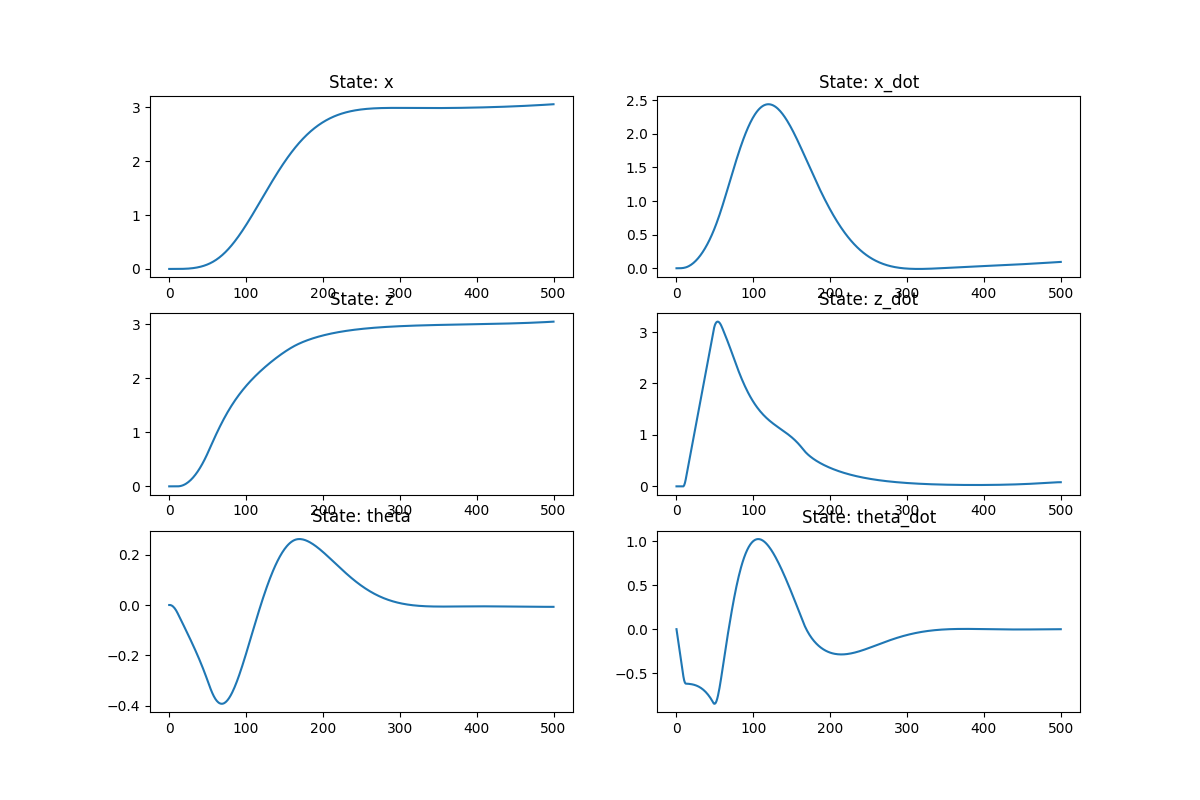

In [11]:
# Plot of the states of the drone as a function of time
plt.figure(figsize=(12, 8))
state_labels = ['x', 'x_dot', 'z', 'z_dot', 'theta', 'theta_dot']
for i in range(n_x):
    plt.subplot(3, 2, i+1)
    plt.plot(range(N+1), x[:, i])
    plt.title(f'State: {state_labels[i]}')
plt.show()

1. **Dynamics**: The first plot named Figure 1 with no constraints shows a static system with no dynamics, while the second image named Figure 1_con depicts a dynamic system with active changes in the environment.
2. **State Changes**: The second image reflects more realistic behavior with variations in state variables and their rates of change over time.

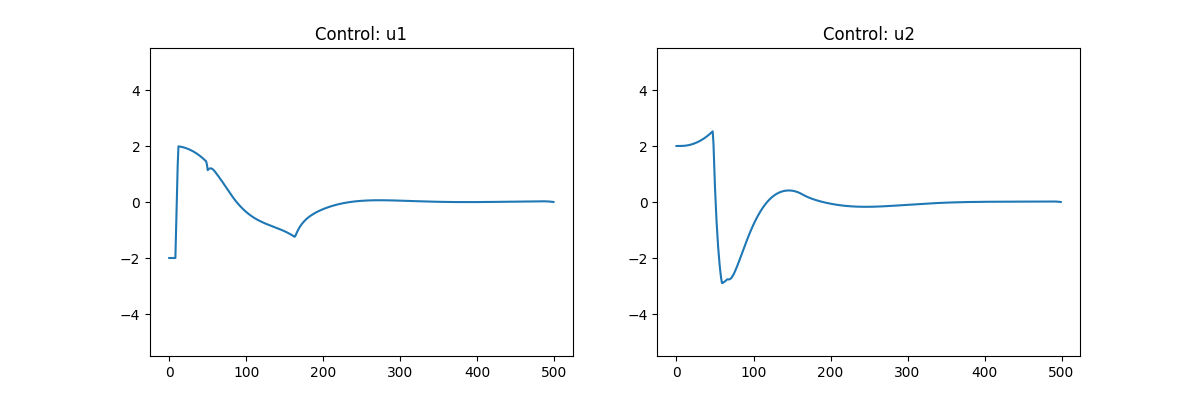

In [12]:
# Plot of the controls of the drone as a function of time
plt.figure(figsize=(12, 4))
control_labels = ['u1', 'u2']
for i in range(n_u):
    plt.subplot(1, 2, i+1)
    plt.plot(range(N), u[:, i])
    plt.title(f'Control: {control_labels[i]}')
    plt.ylim(-5.5, 5.5)  
plt.show()

1. **Dynamics**: The first plot named Figure 2 with no constraints shows a static system with no dynamics, while the second image named Figure 2_con depicts a dynamic system with active changes in the environment.
2. **Optimal Control Changes**: The second image reflects more realistic behavior with variations in optimal control variables and their rates of change over time.